In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Finished in 0.009619 sec
BPM: 100.63551326627653  RMSSD: 18.912950229935053  Emotion: Mild Stress

Finished in 0.008999 sec
BPM: 100.42254459346779  RMSSD: 21.645097475277993  Emotion: Mild Stress

Finished in 0.006987 sec
BPM: 101.79021418569631  RMSSD: 24.745420440962416  Emotion: Increased Parasympathetic Activity

Finished in 0.008553 sec
BPM: 101.90320151198877  RMSSD: 27.48263640191746  Emotion: Increased Parasympathetic Activity

Finished in 0.010758 sec
BPM: 102.53297460463287  RMSSD: 26.33051704771481  Emotion: Increased Parasympathetic Activity

Finished in 0.008077 sec
BPM: 102.44818069639364  RMSSD: 25.528615226839058  Emotion: Increased Parasympathetic Activity

Finished in 0.008069 sec
BPM: 102.39207075804052  RMSSD: 25.954248615592757  Emotion: Increased Parasympathetic Activity

Finished in 0.008082 sec
BPM: 102.6103152097674  RMSSD: 26.781524239136004  Emotion: Increased Parasympathetic Activity

Finished in 0.006042 sec
BPM: 102.27768134791752  RMSSD: 26.990758077534

(0.0, 1000.0)

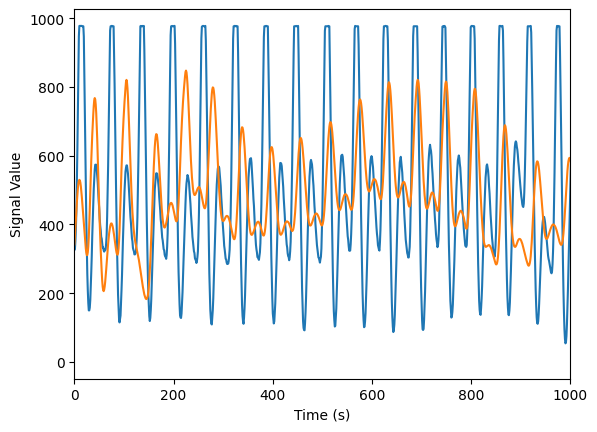

In [ ]:
import matplotlib.pyplot as plt
from heartbeat.heartbeat_sensor.heartbeat_sensors import SimulatedHeartbeatSensor
from heartbeat.heartbeat_sensor.signal_processing import SignalProcessor

sensor = SimulatedHeartbeatSensor(buffer_size=1000)
signal_processor = SignalProcessor()
filter_chunk_length = 100
all_signal_values = []
filtered_signal_values = []

x_min, x_max = 0, 1000

try:
    for i in range(sensor.length):
        signal_value, timestamp = sensor.read_signal()
        all_signal_values.append(signal_value)
        signal_processor.update_signal(signal_value)
        if i > sensor.buffer_size and (i + 1) % filter_chunk_length == 0:
            filtered_signal = signal_processor.filter_noise_ema(sensor.signal_values)
            filtered_signal_values.extend(filtered_signal[-filter_chunk_length:])
            sensor.process(filtered_signal, sensor.timestamps, timing=False)
            emotion = sensor.determine_emotion()
            print(f"BPM: {sensor.measures['bpm']}  RMSSD: {sensor.measures['rmssd']}  Emotion: {emotion.value}")
except Exception as e:
    print('Error:', e)

plt.plot(all_signal_values, label='Raw Signal')
plt.plot(filtered_signal_values, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.xlim(x_min, x_max)